In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# Распределение Рэлея

In [292]:
from scipy.stats import rayleigh

https://en.wikipedia.org/wiki/Rayleigh_distribution

https://ru.wikipedia.org/wiki/Распределение_Рэлея

$\frac{x}{\sigma^2}*exp(-\frac{x^2}{2\sigma^2}), x \geq 0, \sigma > 0$

Сгенерируем выборку объёма 1000 (с $\sigma^2=1$)

In [293]:
rd = sts.rayleigh(0, 1)
rd_rvs = rd.rvs(1000)

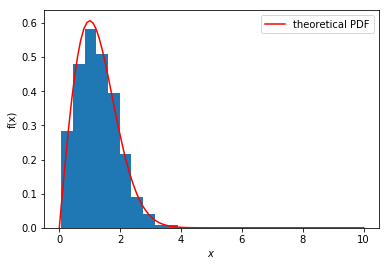

In [451]:
#постройте гистограмму выборки
plt.hist(rd_rvs, normed=True);

#поверх нее теоретическую плотность распределения вашей случайной величины
x = np.linspace(0,10,100)
pdf = rd.pdf(x)
plt.plot(x, pdf, 'r-', label='theoretical PDF')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend();

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

In [355]:
#r_5 = np.array([sum(rd.rvs(5))/5 for i in range(1000)])

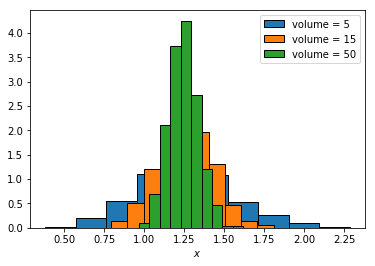

In [452]:
plt.hist(np.mean(rd.rvs([5, 1000]), axis=0), normed=True, ec="black", label = 'volume = 5');
plt.hist(np.mean(rd.rvs([15, 1000]), axis=0), normed=True, ec="black", label = 'volume = 15');
plt.hist(np.mean(rd.rvs([50, 1000]), axis=0), normed=True, ec="black", label = 'volume = 50');
plt.xlabel('$x$')
plt.legend();

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

$ E[X] = \sigma \sqrt\frac{\pi}{2}$

$ D[X] = (2-\pi/2)\sigma^2$

In [453]:
EX = (math.pi/2)**0.5
DX = 2-math.pi/2

 Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение)

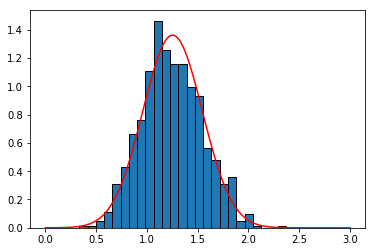

In [454]:
fig, ax = plt.subplots(1, 1)

plt.hist(np.mean(rd.rvs([5, 1000]), axis=0), bins = 'auto', normed=True, ec="black", label = 'volume = 5');

from scipy.stats import norm
x = np.linspace(0,3, 100)
ax.plot(x, norm.pdf(x, loc = EX, scale = math.sqrt(DX/5)), 'r', label='norm pdf');

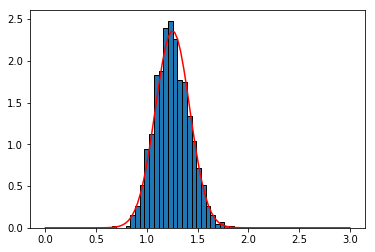

In [455]:
fig, ax = plt.subplots(1, 1)

plt.hist(np.mean(rd.rvs([15, 1000]), axis=0), bins = 'auto', normed=True, ec="black", label = 'volume = 5');

from scipy.stats import norm
x = np.linspace(0,3, 100)
ax.plot(x, norm.pdf(x, loc = EX, scale = math.sqrt(DX/15)), 'r', label='norm pdf');

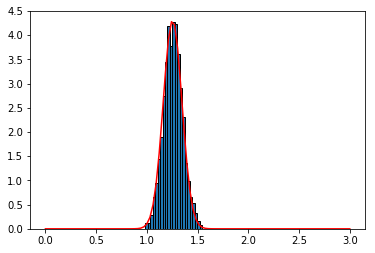

In [456]:
fig, ax = plt.subplots(1, 1)

plt.hist(np.mean(rd.rvs([50, 1000]), axis=0), bins = 'auto', normed=True, ec="black", label = 'volume = 5');

from scipy.stats import norm
x = np.linspace(0,3, 100)
ax.plot(x, norm.pdf(x, loc = EX, scale = math.sqrt(DX/50)), 'r', label='norm pdf');

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

ОТВЕТ: При увеличении объема выборки n выборочная средняя стремится к средней исходного распределения, доверительный интервал уменьшается, а точность аппроксимации увеличивается

### Спасибо за проверку!!!